In [1]:
import numpy as np
from scipy import stats, optimize
import matplotlib.pylab as plt

# Scientific computing with scipy

Another powerful package which can be used for the application of mathematical algorithms as well as for statistics is the [**scipy**](https://scipy.org/) package. It is build upon numpy and can be used for many different methodical applications. We are going to focus on its *stats* and *optimize* module as both modules provide useful methods for the financial domain. 

## Random variables

On financial markets, the majority of developments and linkages are non-deterministic and, thus, must be modeled assuming probability distributions. For instance, the market value development of a company captured by its returns, the default of a debtor, or the co-movement of returns from two or more companies. All these things are uncertain and can be modeled by random variables. Random variables are either *discrete* or *continuous*. The former has only a finite amount of realizations (or infinite countable realizations), while the latter can exhibit an infinite amount of different realizations. Furthermore, if we only examine a single random variable, we use a *univariate* distribution, while *multivariate* distributions are used for probability modeling of more then one variable. Multivariate modeling needs to deal with univariate characteristics such as the center of a distribution and the dependence between the random variables. 

### Univariate random variables
For a discrete random variable, the function assigning probabilities to its realizations is called **probability mass function** and is given by a list-alike definition:

$$
f(x) = \begin{cases}
			P_X(\{ x \}) & \text{for } X = x  \\
			0 & \, \text{else}
         \end{cases}
$$


The function 

$$
F(x) = P_X\left( \{X |X \leq x \} \right) = P_X\left( (-\infty, x] \right) = \sum_{x_i \leq x} f(x_i)
$$

is called **cumulative distribution function**.

For a continuous random variable, the probability of a concrete realization is equal to 0, $P(X = x) = 0$. Instead of directly defining a function mapping probabilities to subsets of $\mathbb{R}$, we define a **probability density function** $f(x)$ which enables us to determine probabilities by integration. The domain of this function must be the set of all possibles states of $X$. Furthermore, it must hold the $f(x) \geq 0$ for all $x$ and that $\int_{-\infty}^{\infty} f(x)dx = 1$. With this definition the corresponding cumulative distribution function is given by:

$$
F(x) = \int_{-\infty}^{x} f(t)dt
$$

Probability distributions can be compared by numbers which summarize their characteristics such as location, variation, shape and so on. For this purpose, ordinary and central moments of the distributions are used. 

The **expectation** or **expected value** of a random variable if defined as:

$$
E(X) = \begin{cases}
			\sum_i x_i \cdot f(x_i) &  X   \text{ discrete} \\
			\int_{-\infty}^{\infty} x \cdot f(x) dx & X \text{ continuous}
       \end{cases}
$$

The **variance** measures how much realizations of a random variable vary and is defined by:

$$
Var(X) = E(X-E(X))^2 =
			\begin{cases}
			\sum_i (x_i - E(X))^2 \cdot f(x_i)   & X \text{ discrete} \\
			\int_{-\infty}^{\infty} (x - E(X))^2 \cdot f(x) dx  & X \text{ continuous}
			\end{cases}
$$

For the variance, it holds that $Var(a + bX) = b^2 Var(X)$. The square root of the variance defines the **standard deviation** which is often denoted by the symbol $\sigma_X$.

If a probability distribution is not symmetric it is skewed. To quantify **skewness**, we use:

$$
\frac{E \left[\left(X - E(X)\right)^3 \right]}{\sigma_X^3}  
$$

For negative values, the distribution is left skewed and for positive values, the distribution is right skewed. In addition of skewness, **kurtosis** is also often used for the characterization of probability distributions. 

$$
\frac{E \left[\left(X - E(X)\right)^4 \right]}{\sigma_X^4}  
$$

To characterize the level of kurtosis, the normal distribution is usually taken as a reference. It exhibits a kurtosis of $3$. If distributions exhibit higher kurtosis than $3$, we speak of excess kurtosis and leptokurtic distributions. These distributions are characterized by higher probability mass in the tails of the distribution. This means, extreme outcomes of the random variable are more likely. If a distribution exhibits a kurtosis lower then $3$, we say it is platokurtic. 

Besides those four characteristic measures, quantiles of probability distributions can be used for informational purposes. Let us denote $F^{-1}: [0, 1] \to \mathbb{R}$ as the inverse of the cumulative probability density function. Given some probability $\alpha$, we say $x_{\alpha}$ is the $\alpha$ **quantile** of $X$, if:

$$
1 - F(x_{\alpha}) \geq 1 - \alpha ~~\text{and } F(x_{\alpha}) \geq \alpha
$$


### Multivariate random variables

Typically, we will take a look at multiple random variables at the same time. Very often certain relationships exist between these variables. The distribution over multiple random variables is described by their univariate characteristics together with their linkages. Given $p$ random variables which are described by a random vector $\boldsymbol{x}$, the distribution is described by its joint distribution function

$$
F(\boldsymbol{x}) = F(x_1, ..., x_p) = P(X_1 \leq x_1, ..., X_p \leq x_p)
$$

Technically $F$ can be separated into $F(x_1, ..., x_f) = C(F_{X_1}(x_1), ..., F_{X_p}(x_p))$ where $C$ is called a copula which specifies the dependence structure between the univariate random variables and $F_{X_1}, ..., F_{X_p}$ are univariate distributions.

Random variables $X_1, ..., X_p$ are **independent** if their joint distribution is given by the product of their univariate distributions:

$$
f(x_1, ...., x_p) = f_{X_1}(x_1) \cdot ... \cdot f_{X_p}(x_p)
$$

To quantify **linear dependence** between two random variables the pairwise **covariance** is used.

$$
Cov(X,Y) = E\left[(X_1-E(X_1))\cdot (X_2-E(X_2)) \right] = E(X_1\cdot X_2) - E(X_1)E(X_2)
$$

The covariance can be scaled by the standard deviations of $X_1, X_2$ which leads to the **coefficient of linear correlation** which is in the range $[-1, 1]$:

$$
\rho = \frac{Cov(X_1,X_2)}{\sqrt{Var(X_1)} \cdot \sqrt{Var(X_2)}}
$$

It is important to understand that only linear dependence is captured adequately by covariance. Therefore, it is sometimes more reasonable to take into account metrics which also capture non-linear dependencies in an adequate way. An example is Spearman's rho which is defined by:

$$
\rho_S = \frac{Cov(rg_{X_1},rg_{X_2})}{ \sigma_{rg_{X_1}} \cdot \sigma_{rg_{X_2}}}
$$

where $rg$ stands for the rank of the realization and not its value.

### Probabilty distributions

Random variables are usually modeled by parametric distributions which means that certain parameter values are used for calculating densities and, thus, determine the distribution. Once we assume a certain distribution and its parameters, we can do different things, e.g., determine moments for the distribution, determine probabilities for the outcomes of a random process, simulate data of a random process, etc. Scipy implements a variety of discrete and continuous probability distributions which can be found [here](https://docs.scipy.org/doc/scipy/reference/stats.html). Each distribution comes with a variety of useful methods that can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous). Below, you can see a demonstration how to work with the `pdf`, `cdf`, `rvs` and `ppf` methods which implement the density, the cumulative density function, a way to simulate data for this distribution and the inverse cumulative density function.

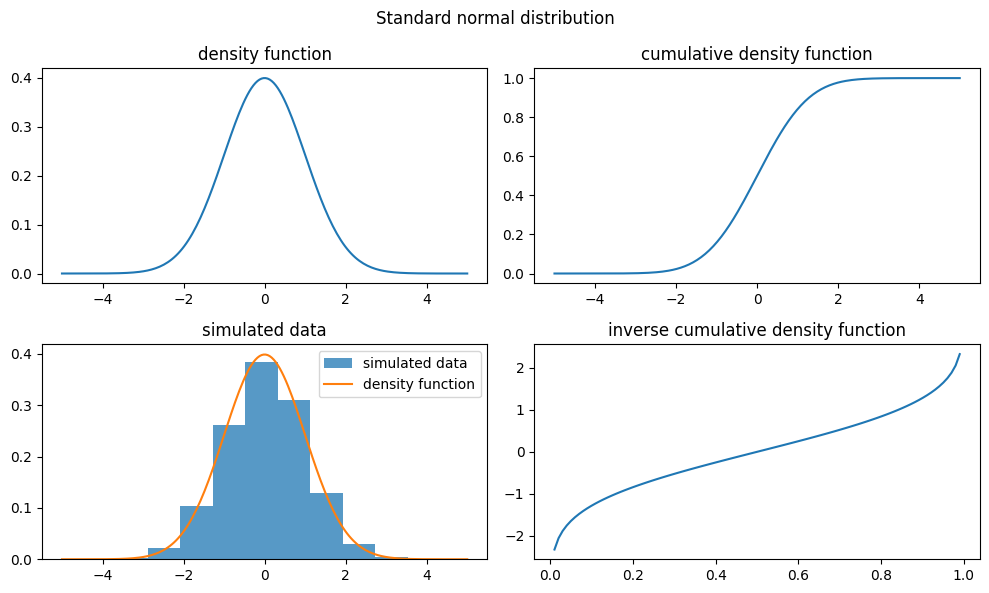

In [2]:
fig, axs = plt.subplots(2, 2, figsize = (10, 6))

x = np.linspace(-5, 5, 200)
axs[0, 0].plot(x, stats.norm.pdf(x))
axs[0, 1].plot(x, stats.norm.cdf(x))
y = stats.norm.rvs(size = 10000)
axs[1, 0].hist(y, density = True, alpha = 0.75, label = "simulated data")
axs[1, 0].plot(x, stats.norm.pdf(x), label = "density function")
axs[1, 0].legend()
u = np.linspace(0.01, 0.99, 100)
axs[1, 1].plot(u, stats.norm.ppf(u))
axs[0, 0].set_title("density function")
axs[0, 1].set_title("cumulative density function")
axs[1, 0].set_title("simulated data")
axs[1, 1].set_title("inverse cumulative density function")
fig.suptitle("Standard normal distribution")
fig.tight_layout()

Calculations can be done as you hopefully remember from your statistics classes. For instance, the probability $P \left(1 \leq X \leq 2 \right) = P \left( X \leq 2 \right) - P \left( X \leq 1 \right)$ can be determined by:

In [3]:
stats.norm.cdf(2) - stats.norm.cdf(1)

np.float64(0.13590512198327787)

Or the $0.95$ quantile $F^{-1}\left(0.95\right)$ is given by:

In [4]:
stats.norm.ppf(0.95)

np.float64(1.644853626951472)

Note that sampling random variables from a distribution can be quite powerful. The Glivenko-Cantelli theorem shows that an empirical distribution converges to the true distribution (almost surely) as the number of independent and identically observations from a distribution grows. This means, if we collect a large number of random samples from the distribution, we can be certain that the main characteristics from the distribution are captured by the empirical estimates of the samples. Let me give you an example why we sometimes need to simulate data instead of directly calculate outcomes. 

Given two random variables $X_1, X_2$, we may be interested in the linear combination $Z = X_1 + X_2$. If $X_1, X_2$ are normally distributed with mean $\mu_1, \mu_2$ and variance $\sigma_1^2, \sigma_2^2$, $Z$ is again normally distributed with mean $\mu_1 + \mu_2$ and variance $\sigma_1^2 + \sigma_2^2$. The same does not hold if $X_1, X_2$ are lognormal distributed. Assume an insurance company sells two contracts whose damages $L_1, L_2$ are lognormal distributed. If $X_1, X_2$ are normally distributed, $L_1 = e^{X_1}, L_2 = e^{X_2}$ are lognormal distributed. Now, assume the insurance company wants to determine the $0.95$ quantile of the sum of losses from both contracts $S = L_1 + L_2$. This can not be done be determined by a closed-form inverse cumulative distribution function of $S$ as we do not know the distribution of $S$. However, if we sample a large number from $L_1, L_2$ and calculate the corresponding sums, we get the empirical distribution of $S$ and can use its quantile as a close approximation to the actual one. See the cell below how to do this.

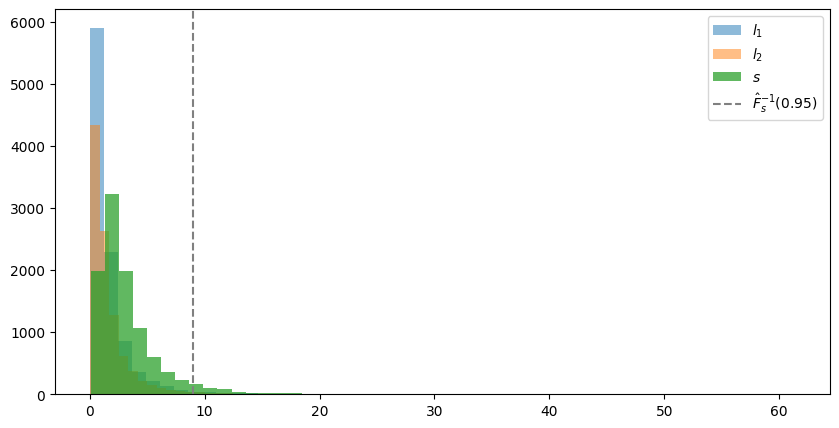

The estimated quantile of S is: 8.9435


In [5]:
# number of random samples
n = 10000

# sample normal random variables
x_1, x_2 = stats.norm.rvs(size = n), stats.norm.rvs(size = n)
# transform to lognormal random variables
l_1, l_2 = np.exp(x_1), np.exp(x_2)
# determine the sum of both losses
s = l_1 + l_2

# visualize
fig, ax = plt.subplots(figsize = (10, 5))
ax.hist(l_1, alpha = 0.5, label = r"$l_1$", bins = 50)
ax.hist(l_2, alpha = 0.5, label = r"$l_2$", bins = 50)
ax.hist(s, alpha = 0.75, label = r"$s$", bins = 50)
ax.axvline(np.quantile(s, 0.95), color = "grey", linestyle = "--", label = r"$\hat{F}_s^{-1}(0.95)$")
ax.legend()
plt.show()

print(f"The estimated quantile of S is: {np.quantile(s, 0.95):.4f}")

Note that we neglected to set parameters of the distributions so far. As stated before, the parameters define the distribution. Distributions differ in the number of parameters which define them. Scipy implements all distributions in their standardized versions and shifts and scales all distributions by the `loc`and `scale`values which can be set. This means, given the parameters for the standardized distribution $\boldsymbol{\theta}$ and its density $f(x | \boldsymbol{\theta})$, the density of a variable with the same distribution, but with location and scale parameters $l, s$ is determined by:

$$
g(y | \boldsymbol{\theta}, l, s) = f\left(\frac{y - l}{s} | \boldsymbol{\theta}\right) \frac{1}{s}
$$

Given, we assume a certain distributional form for a random variable and collect random variables $(Y_1, ..., Y_n)$. A popular choice to estimate a set of reasonable parameters for the distribution is given by maximum likelihood estimation. Assuming independent and identically distributed (iid) random variables, the likelihood of the data is given by:

$$
\mathcal{L}(\boldsymbol{\theta}) = \prod_{i = 1}^{n} f(Y_i | \boldsymbol{\theta})
$$

Out of technical reasons, we usually maximize the log-likelihood:

$$
\ln\left( \mathcal{L}(\boldsymbol{\theta}) \right) = \sum_{i = 1}^{n} \ln \left(f(Y_i | \boldsymbol{\theta})\right)
$$

The parameter is estimated by:

$$
\boldsymbol{\theta}_{ML} = \arg \max_{\boldsymbol{\theta}} \ln\left( \mathcal{L}(\boldsymbol{\theta}) \right)
$$

This is implemented by scipy using the `fit` method. However, we may want to do this on our own, after the next subchapter which takes a look at optimization in scipy.

## Optimization

Optimization is an important tool in the financial domain. A rather obvious example is given by portfolio optimization which aims to distribute capital among investments in the most profitable (risk-adjusted) way. However, beyond such obvious examples, in many cases, decisions in the financial domain, are build upon empirical analysis which use models that are adjusted to empirical data in the best possible way. To specify what the best possible way is, let us quickly recap important aspects of optimization.

### One-dimensional functions

Given a real-valued function $f: \mathbb{R} \to \mathbb{R}$, we say that $x_{*}$ is a local minimum, if $f\left( x_{*} \right) \leq f(x)$ for all $x \in [x_{*} - \epsilon, x_{*} + \epsilon]$. Basically this means in a certain range of x, no function value is smaller or equal to $f\left( x_{*} \right)$. A global minimum is the value $x_{**}$ for which it holds that $f\left( x_{*} \right) \leq f(x)$ for all $x \in \mathbb{R}$. Usually it is enough to examine a function for minima, because if we want to find maxima of a function, we can search for the minima of $-f$ due to the min-max-duality. See below, that the value on the x-axis which minimizes $f$ is the same which maximizes $-f$. This is what is meant by it.

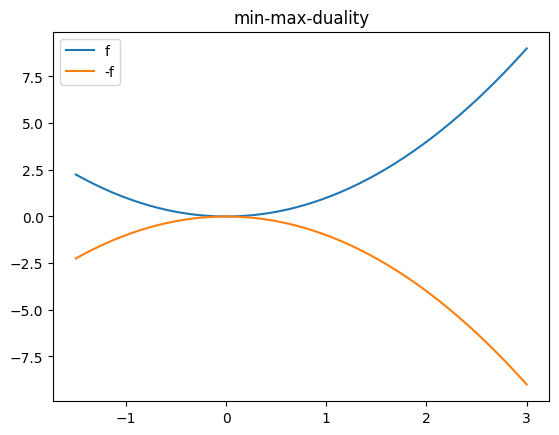

In [6]:
f = lambda x: np.exp((x - 0.7)**2)
f = lambda x: x**2
x = np.linspace(-1.5, 3, 200)
plt.plot(x, f(x), label = "f")
plt.plot(x, -f(x), label = "-f")
plt.title("min-max-duality")
plt.legend()
plt.show()

In order to search for candidates of local minima, we search for solutions of:

$$
\frac{\partial f}{\partial x} = 0
$$

These are called stationary points $x^{\circ}$. To examine if the stationary point is an extreme, we further investigate the second derivative. If

$$
\frac{\partial^2 f}{\partial^2 x^{\circ}} > 0
$$

then a local minimum is found at $x^{\circ}$. If the domain of $f$ is bounded, we may further want to investigate the bounds as potential candidates.

### Multi-dimensional functions

The more common scenario is that we need the minimum of a function of type $f: \mathbb{R}^p \to \mathbb{R}$ which means the function depends on $p$ input variables. To search for stationary points, we look for input values $\boldsymbol{x}$ which satisfy:

$$ 
\nabla f (\boldsymbol{x}) = \boldsymbol{0}
$$

where $ \nabla f $ is the gradient of $f$ and can be determined by its partial derivatives:

$$
\nabla f = 
\begin{pmatrix}
    \frac{\partial f}{\partial x_1} \\
    \vdots \\
    \frac{\partial f}{\partial x_p} \\
\end{pmatrix}
$$

Given a stationary point, we further need to examine the Hessian matrix:

$$
\boldsymbol{H} (\boldsymbol{x}) = 
\begin{pmatrix}
    \frac{\partial^2 f}{\partial^2 x_1} (\boldsymbol{x}) & \frac{\partial^2 f}{\partial x_1 \partial x_2} (\boldsymbol{x}) & ... & \frac{\partial^2 f}{\partial x_1 \partial x_p} (\boldsymbol{x}) \\
    \frac{\partial^2 f}{\partial x_2 \partial x_1} (\boldsymbol{x}) & \frac{\partial^2 f}{\partial^2 x_2} (\boldsymbol{x}) & ... & \frac{\partial^2 f}{\partial x_2 \partial x_p} (\boldsymbol{x})\\
    \vdots  & \vdots & & \vdots \\
    \frac{\partial^2 f}{\partial x_p \partial x_1} (\boldsymbol{x}) & \frac{\partial^2 f}{\partial x_p \partial x_2} (\boldsymbol{x}) & ... & \frac{\partial^2 f}{\partial^2 x_p } (\boldsymbol{x})\\
\end{pmatrix}
$$

If the Hessian matrix is positive definite (all its eigenvalues are positive) at this point, we found a local minimum. After identifying all local minima of a function, we should be able to identify one or multiple global minima.

### Important characteristics for optimization

The presented way for optimization is the best and easiest possible scenario. It assumes that derivatives can be determined and the roots for stationary points can be determined analytically. Often, this may not hold and depending on some characteristics of $f$ further complications may occur.

#### Convex vs. non-convex functions

Given a function $f:\mathbb{R} \to \mathbb{R}$, then $f$ is strictly convex, if for all $x, y \in \mathbb{R}, x \neq y$ with $\lambda \in (0, 1)$ it holds that:

$$ f(\lambda x + (1 - \lambda) y) < \lambda f(x) + (1 - \lambda) f(y) $$

If you take a look at the plots below, you will realize that whenever you draw a line between two points of the convex function, the function value of the combination of these points is smaller than the corresponding combination of function values. It can be shown that a local minimum for a strictly convex function is also the global minimum. Thus, looking for the global minimum of a strictly convex function is easy, because we only need to identify the stationary point and can stop. However, if a function is non-convex, we need to examine all stationary points with great attention. The latter becomes hard, if we approach situations for which no analytical solution of stationary points can be determined.

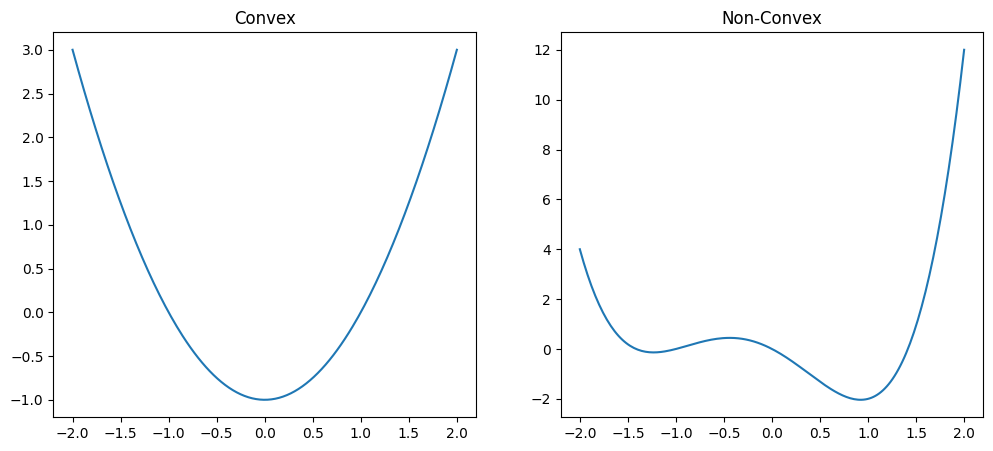

In [7]:
fc = lambda x: x**2 - 1
fnc = lambda x: x**4 + x**3 - 2 * x**2 - 2*x
x = np.linspace(-2, 2, 200)

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].plot(x, fc(x))
axs[1].plot(x, fnc(x))
axs[0].set_title("Convex")
axs[1].set_title("Non-Convex")
plt.show()

#### Optimization under constraints

Sometimes the search space for minima is restricted by constraints of the form $c(x) \leq b$. Constraints can be included in the optimization process by different techniques such as substitution, Lagrange multipliers or by altering the objective function.


#### Absence of analytical solutions

Sometimes stationary points can not be tracked analytically. Furthermore, determining the gradient itself may not be possible and its value must be approximated. For all these scenarios, approximation algorithm exists, however, these come along with deviations from true solutions and induce errors. This further complicates the search for a true local minimum. 

Scipy implements many different methods algorithms for function optimization. These are all algorithms which determine the possible minima by search based algorithms, thus, approximating the true solutions. Some of them enable the user to provide the gradient and Hessian, respectively, or both can be approximated by different methods. Let us take a look at some examples how to work with scipy to optimize some functions. 

### Examples

Let us take a look at some examples which are used in the financial domain, among others. 

#### Least-squares minimization

One popular example is least squares minimization. For instance assume, we have sample data: $\lbrace 1, 2, 3 \rbrace$ and we want to determine $\mu$ such that:

$$
\min_{\mu} \sum_{i=1}^n \left( x_i - \mu \right)^2
$$

Thus, our function depends on a single variable $\mu$ and outputs a single real valued number, i.e., $f: \mathbb{R} \to \mathbb{R}$ with $ f\left( \mu \right) = \sum_{i=1}^{n} \left(x_i - \mu\right)^2$. We can determine the analytical solution first. To find stationary points, we must find $\mu$ such that:

$$ \frac{\partial f}{\partial \mu} =   \sum_{i=1}^{n} -2 \left(x_i - \mu\right) \stackrel{!}{=} 0$$

This gives us:

$$ 
2 \sum_{i=1}^{n} \mu  = 2 \sum_{i=1}^{n} x_i \\
n \mu  = \sum_{i=1}^{n} x_i \\
\mu = \frac{1}{n} \sum_{i=1}^{n} x_i \\
$$

as the potential candidate. Checking the value of the second derivative at this point $\frac{\partial^2 f}{\partial^2 \mu} \left( \mu \right) =  2 n > 0$ tells us that we found a local minimum which is also the global minimum. The plot visualizes the search for the minimum, on the x-axis you see potential candidates for $\mu$ and corresponding values for $f(\mu)$ can be found on the y-axis.

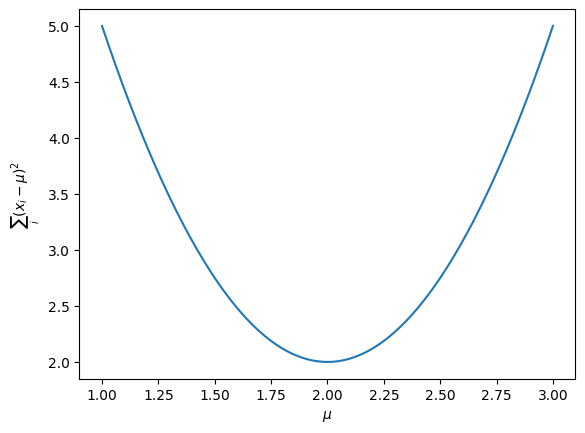

In [8]:
x = np.array([1, 2, 3])
sos = lambda mu: np.sum((x - mu)**2)
mu_candidates = np.linspace(1, 3, 200)

plt.plot(mu_candidates, [sos(mu) for mu in mu_candidates])
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\sum_i \left(x_i - \mu\right)^2$")
plt.show()

For one-dimensional optimization problems, the `minimize_scalar`method of the optimize module can be used. It offers three different algorithms (brent, bounded, golden) to search for the minimum. As the name suggests, the bounded method can be used if we face a bounded optimization problem, i.e., we face some constraints regarding the search space for the function input. All arguments can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar). Below you can see the output for our optimization problem. Besides a message which tells us, if the algorithm terminated successfully, *fun* informs us about the function value at the minimum which is given by *x*, *nit* is the number of iterations the algorithm took. You can see, we found a solution which is almost equal to the analytical solution after $5$ iterations. 

In [9]:
res = optimize.minimize_scalar(sos, bracket = [-10, 10])
res

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 2.0
       x: 1.999999999999999
     nit: 5
    nfev: 8

#### Log-likelihood maximization

As stated in the subchapter before, we can use maximum likelihood estimation to estimate the parameters of a probability distribution for some observed data $ \lbrace x_1, ..., x_n \rbrace $. A popular distribution is the normal distribution. Even though, it often does not adequately capture real-world dynamics, it comes along with appealing mathematical and statistical properties. This is why it is sometime used even though it may come along with an oversimplification. Its negative log-likelihood depends on two parameters $\mu, \sigma^2$ which also are the mean and variance of the distribution. For data $ \lbrace x_1, ..., x_n \rbrace $, it is given by:

$$
l \left( \mu, \sigma^2 \right) = - \frac{n}{2} \log \left(2 \pi \sigma^2 \right) - \frac{1}{2 \sigma^2} \sum_{i = 1}^n \left(x_i - \mu\right)^2
$$

Its gradient is given by:

$$
\nabla l = 
\begin{pmatrix}
\frac{\partial l}{\partial \mu} \\
\frac{\partial l}{\partial \sigma^2} \\
\end{pmatrix}
=
\begin{pmatrix}
-\frac{1}{\sigma^2} \sum_{i = 1}^n \left(x_i - \mu\right) \\
\frac{1}{2\sigma^2} \left(n - \frac{1}{\sigma^2} \sum_{i = 1}^n \left(x_i - \mu\right)^2 \right)
\end{pmatrix}
$$

Solving for the roots of both partial derivatives gives us the estimators:

$$
\mu = \frac{1}{n} \sum_{i = 1}^n x_i \\
\sigma^2 = \frac{1}{n} \sum_{i = 1}^n \left( x_i - \mu \right)^2
$$

Let us skip the Hessian and take a look how we can derive the parameter estimates with the `minimze` method of the optimize module which is able to minimize functions with multiple input variables. Depending on the method, we can use the gradient for the minimization or not. If we have access to the gradient we may want to use the BFGS or L-BFGS-B method. If not, Nelder-Mead or Powell may be good methods to start. Below you can see that the analytical solutions are more or less the same as the solutions found by the L-BFGS-B as well as the Nelder-Mead methods. Note, that for more realistic scenarios we are not able to derive the analytical solution and need to rely upon solutions found by the `minimize` method, only. Further note, how simply we can include bounds for the parameters. Especially, for the variance, it is necessary to work with bounds as it must be a positive number. In practice, it might be a good idea to set some bounds for $\mu$ as well and enlarge them if found solutions are at the edges of the bounds. 

In [10]:
def neg_ll(theta, x):
    mu, sigma_sq = theta
    n = len(x)
    ll = -(n/2) * np.log(2*np.pi*sigma_sq) - (2*sigma_sq)**(-1) * np.sum((x - mu)**2)
    return -ll

def grad(theta, x):
    mu, sigma_sq = theta
    n = len(x)
    deriv_mu = -sigma_sq**(-1) * np.sum(x - mu)
    deriv_sigma = (2*sigma_sq)**(-1) * (n - sigma_sq**(-1)*np.sum((x - mu)**2))
    return deriv_mu, deriv_sigma

# sample some data of a standard normal distribution
np.random.seed(42)
x = stats.norm.rvs(size = 100)

# for comparison let us determine the analytical solutions of the mle
mu_mle = x.mean()
sigma_sq_mle = ((x-x.mean())**2).mean()
print(fr"MLE estimates for mu and sigma_squared are: {mu_mle:.4f}, {sigma_sq_mle:.4f}")

# minimize with gradients and the L-BFGS-B method
optimize.minimize(neg_ll, x0 = np.array([1., 2.]), args = (x), jac = grad, method = "L-BFGS-B", bounds = [(np.min(x), np.max(x)), (0.001, 5000)])

MLE estimates for mu and sigma_squared are: -0.1038, 0.8165


  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: 131.75879410959755
        x: [-1.038e-01  8.165e-01]
      nit: 7
      jac: [ 8.247e-07 -1.189e-05]
     nfev: 16
     njev: 16
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

In [11]:
# Optimization using the Nelder-Mead method
optimize.minimize(neg_ll, x0 = np.array([1., 2.]), args = (x), method = "Nelder-Mead", bounds = [(np.min(x), np.max(x)), (0.001, 5000)])

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 131.75879418567382
             x: [-1.038e-01  8.165e-01]
           nit: 42
          nfev: 83
 final_simplex: (array([[-1.038e-01,  8.165e-01],
                       [-1.038e-01,  8.166e-01],
                       [-1.039e-01,  8.165e-01]]), array([ 1.318e+02,  1.318e+02,  1.318e+02]))

We end this chapter here and leave other examples for the tutorial. Note, that many optimization routines such as maximum likelihood estimation for probability distributions usually are well implemented and we do not need to conduct optimization on our own. However, the more advanced models become, the higher the more likely it gets that we are in need of manually estimating models by optimization techniques. The `minimize` method of the optimize module is a good starting point, especially, for models whose parameters are bounded.